In [1]:
import os
import sys
import numpy as numpy
from numpy import ndarray
from matplotlib.legend import Legend
from matplotlib import pyplot as pyplot
from typing import List

base_dir: str = os.getcwd()
os.environ['LAMMPS_PYTHON_BASE_PATH'] =  os.path.join(base_dir, '../../../../../md-analysis-tutorial/python/src')
sys.path.append(os.getenv('LAMMPS_PYTHON_BASE_PATH'))

from modules.line_graph import LineGraph

# Extract H2O-PEG(O) RDF histogram data for unstretched & stretched PEG

In [2]:
base_dir: str = os.getcwd()
rdf_path: str = os.path.join(base_dir, '../data/raw/rdf-vs-time/')
deformed_solvated_peg_rdf_vs_distance_data_array: List[ndarray] = []

# File contains columns of data, the .T transpose operation switches them to rows, making it easier to
# unpack into separate variables
# Extract H2O-PEG(O) unstretched PEG RDF histogram data
(unstretched_bin, unstretched_distance, unstretched_bin_rdf,
 unstretched_bin_coordination_number, unstretched_bin_cumulative_coordination_number,
 unstretched_bin_atom_pairs_histo) = numpy.genfromtxt(
    os.path.join(rdf_path, 'ave_PEG_H2O_RDF_initial.dat'),
    skip_header=4,
    usecols=range(6)
).T

# Combine unstretched distance and unstretched RDF values into ndarray
deformed_solvated_peg_rdf_vs_distance_data_array.append(
    numpy.vstack((unstretched_distance, unstretched_bin_rdf)),
)

# Extract H2O-PEG(O) stretched PEG RDF histogram data
(stretched_bin, stretched_distance, stretched_bin_rdf,
 stretched_bin_coordination_number, stretched_bin_cumulative_coordination_number,
 stretched_bin_atom_pairs_histo) = numpy.genfromtxt(
    os.path.join(rdf_path, 'ave_PEG_H2O_RDF_final.dat'),
    skip_header=4,
    usecols=range(6)
).T

# Combine stretched distance and stretched RDF values into ndarray
deformed_solvated_peg_rdf_vs_distance_data_array.append(
    numpy.vstack((stretched_distance, stretched_bin_rdf)),
)

# Create Matplotlib graph to plot H2O-PEG(O) RDF vs distance

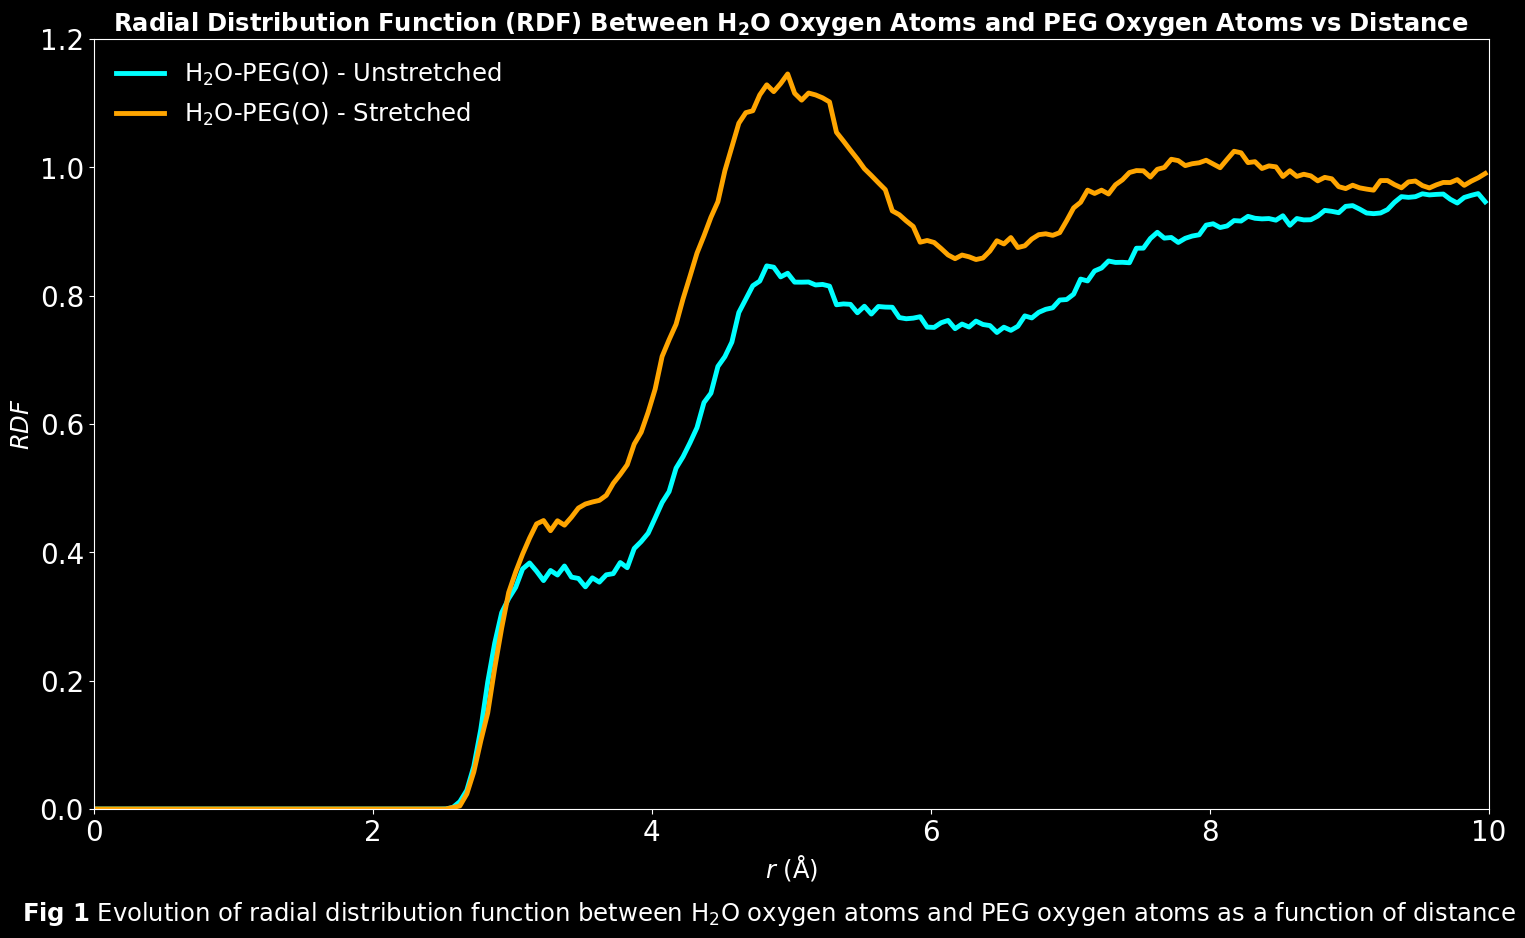

In [3]:
# Create 'H2O-PEG(O) RDF vs distance' line graph
LineGraph.single_line_graph(
    data_arrays=deformed_solvated_peg_rdf_vs_distance_data_array,
    figure_size=(18, 10),
    line_labels=[r'H$_{2}$O-PEG(O) - Unstretched', r'H$_{2}$O-PEG(O) - Stretched'],
    line_colours=['cyan', 'orange'],
    x_label=r'$r$ (Å)',
    y_label=r'$RDF$',
    y_lim=(0.0, 1.2),
    x_lim=(0, 10),
    graph_title=r'$\bf{Radial\ Distribution\ Function\ (RDF)\ Between\ H_{2}O\ Oxygen\ Atoms\ and\ PEG\ Oxygen\ '
                r'Atoms\ vs\ Distance}$',
    figure_text=r'$\bf{Fig\ 1}$ Evolution of radial distribution function between H$_{2}$O oxygen atoms and '
                r'PEG oxygen atoms as a function of distance',
    figure_text_font_size=17.5,
    figure_text_x_coord=0.5,
    figure_text_y_coord=0.005,
    font_size=17.5,
    tick_label_size=20,
    line_width=3.5,
    line_labels_position='upper left',
    save_path=os.path.join(base_dir, '../reports/figures/graphs/H2O_PEG_rdf_vs_distance.png')
)